<h1>STXBP1 genotype-phenotype correlation  analysis</h1>
<p>todo</p>

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.2.1.dev0


## Select transcript

We use MANE transcript:

In [2]:
STXBP1_MANE_transcript = 'NM_003165.6'
STXBP1_protein_id = 'NP_003156.1'

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import load_phenopackets, configure_caching_cohort_creator

cohort_name = 'STXBP1'
phenopacket_store_release = '0.1.19'

cohort_creator = configure_caching_cohort_creator(hpo)
registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
del phenopackets
validation.summarize()


Patients Created:  17%|█▋        | 81/463 [02:28<09:44,  1.53s/it]

Expected a result but got an Error for variant: 9_127684373_127684373_A_A
{"error":"request for consequence of [A] matches reference [A]"}


Patients Created: 100%|██████████| 463/463 [11:05<00:00,  1.44s/it]
Validated under none policy
Showing errors and warnings
Phenopackets
  patient #71
    phenotype-features
     warnings:

  patient #81
    variants
     warnings:

      #0
       warnings:
       ·Patient STX_23708187_T23289 has an error with variant 9_127684373_127684373_A_A. Try again or remove variant form testing... Expected a result but got an Error. See log for details.
  patient #219
    phenotype-features
     warnings:

  patient #382
    phenotype-features
     warnings:



<h2>CohortViewer</h2>
<p>The CohortViewer class offers various methods to create tables and graphics to view the data in the cohort.
It is still very much in progress</p>

In [4]:
from IPython.display import display, HTML
from gpsea.view import CohortViewable

viewer = CohortViewable(hpo=hpo)
html = viewer.process(cohort=cohort, transcript_id=STXBP1_MANE_transcript)
display(HTML(html))

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,230
Absent speech,HP:0001344,152
Infantile spasms,HP:0012469,143
Hypsarrhythmia,HP:0002521,120
"Intellectual disability, severe",HP:0010864,106
Inability to walk,HP:0002540,93
Generalized tonic seizure,HP:0010818,92
Multifocal epileptiform discharges,HP:0010841,86
Bilateral tonic-clonic seizure,HP:0002069,77
EEG with burst suppression,HP:0010851,75


<Axes: title={'center': 'Syntaxin-binding protein 1\ntranscript: NM_003165.6, protein: NP_003156.1'}>

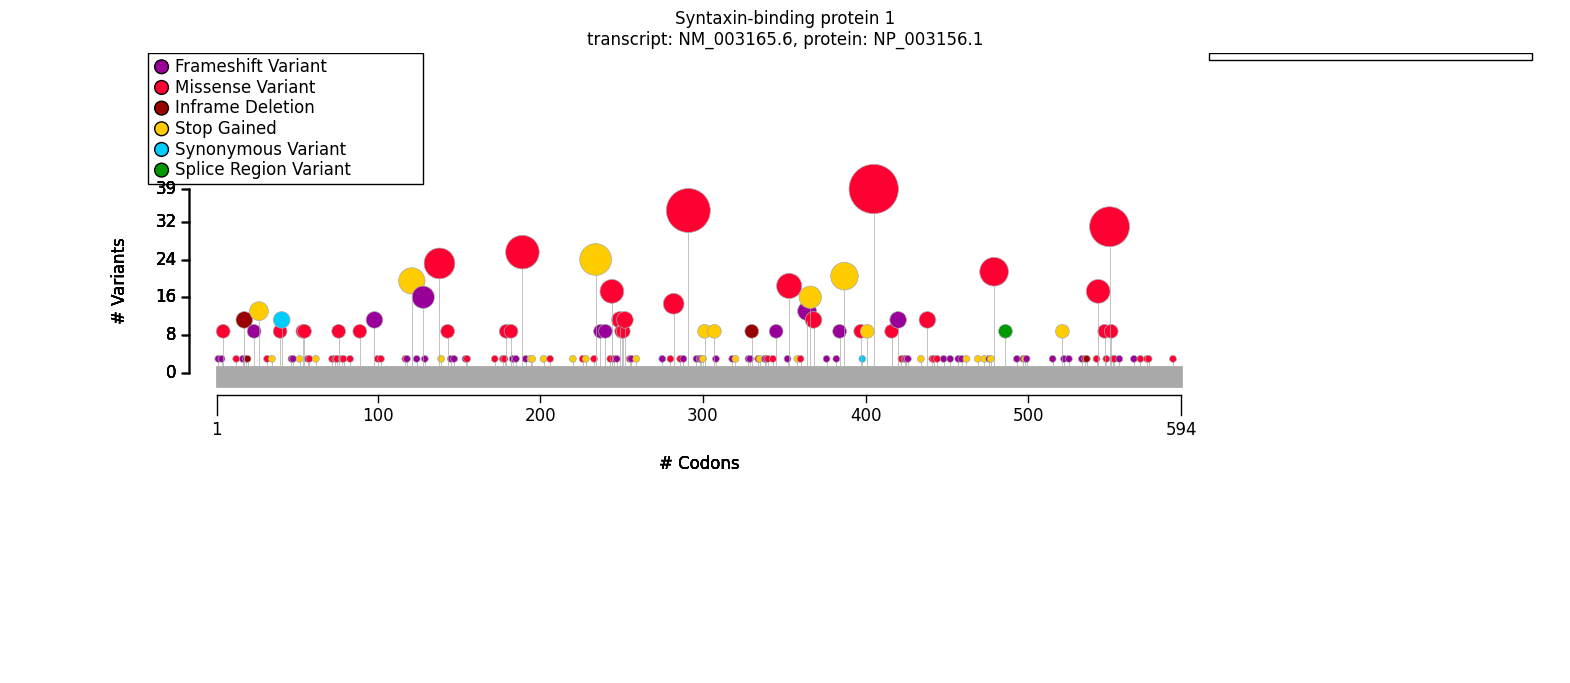

In [5]:
from gpsea.preprocessing import UniprotProteinMetadataService
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(STXBP1_MANE_transcript)
from gpsea.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(STXBP1_protein_id)
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [6]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature


## Analysis

In [7]:
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration

config = CohortAnalysisConfiguration()
config.pval_correction = 'fdr_bh'
config.hpo_mtc_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=config)

In [8]:
from gpsea.analysis.predicate import PatientCategories
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=STXBP1_MANE_transcript)
missense = analysis.compare_hpo_vs_genotype(is_missense)
missense.summarize(hpo, category=PatientCategories.YES)

MISSENSE_VARIANT on NM_003165.6                       Yes  ...                  
                                                    Count  ... Corrected p value
Febrile seizure (within the age range of 3 mont...  15/18  ...               1.0
Seizure precipitated by febrile infection [HP:0...  15/18  ...               1.0
Infection-related seizure [HP:0032892]              15/18  ...               1.0
Atonic seizure [HP:0010819]                         12/15  ...               1.0
Focal impaired awareness autonomic seizure [HP:...    4/7  ...               1.0
...                                                   ...  ...               ...
Abnormal cerebral cortex morphology [HP:0002538]    15/21  ...               1.0
Leukoencephalopathy [HP:0002352]                      3/9  ...               1.0
Increased head circumference [HP:0040194]             3/3  ...               1.0
Abnormal hindbrain morphology [HP:0011282]            1/3  ...               1.0
Atrophy/Degeneration affecting the cerebrum [HP...  19/25  ...               1.0

[102 rows x 6 columns]

Done for now.